###Importação de Bibliotecas e Carga dos Dados


In [1]:
# 1º Passo: Carregar bibliotecas e o dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# URL do dataset
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

# Carregar o dataset
try:
    df = pd.read_csv(url)
    print("Dataset carregado com sucesso!")
    print("\nPrimeiras 5 linhas do dataset:")
    print(df.head())
except Exception as e:
    print(f"Erro ao carregar o dataset pela URL: {e}")
    print("\nCOMO ALTERNATIVA: Baixe o arquivo CSV para o seu computador e faça o upload para o Colab usando o menu à esquerda.")

Dataset carregado com sucesso!

Primeiras 5 linhas do dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### Tratamento de Dados


In [2]:
# 2º Passo: Realizar tratamento de colunas e linhas

print("Informações básicas do DataFrame:")
df.info()

print("\nVerificando se há valores nulos:")
print(df.isnull().sum())
print("\nO dataset não possui valores nulos, o que facilita o tratamento.")

# Copiando o dataframe para não alterar o original
df_processed = df.copy()

# Transformando colunas categóricas em numéricas
# 'sex' e 'smoker' podem ser mapeados diretamente para 0 e 1
df_processed['sex'] = df_processed['sex'].map({'female': 0, 'male': 1})
df_processed['smoker'] = df_processed['smoker'].map({'no': 0, 'yes': 1})

# Para a coluna 'region', que tem mais de duas categorias, usamos One-Hot Encoding
# Isso cria novas colunas para cada região, evitando uma ordem numérica que não existe.
df_processed = pd.get_dummies(df_processed, columns=['region'], drop_first=True, dtype=int)

print("\nDataset após o pré-processamento:")
df_processed.head()

Informações básicas do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Verificando se há valores nulos:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

O dataset não possui valores nulos, o que facilita o tratamento.

Dataset após o pré-processamento:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


###Análise Gráfica dos Dados


Gerando gráficos para análise exploratória...


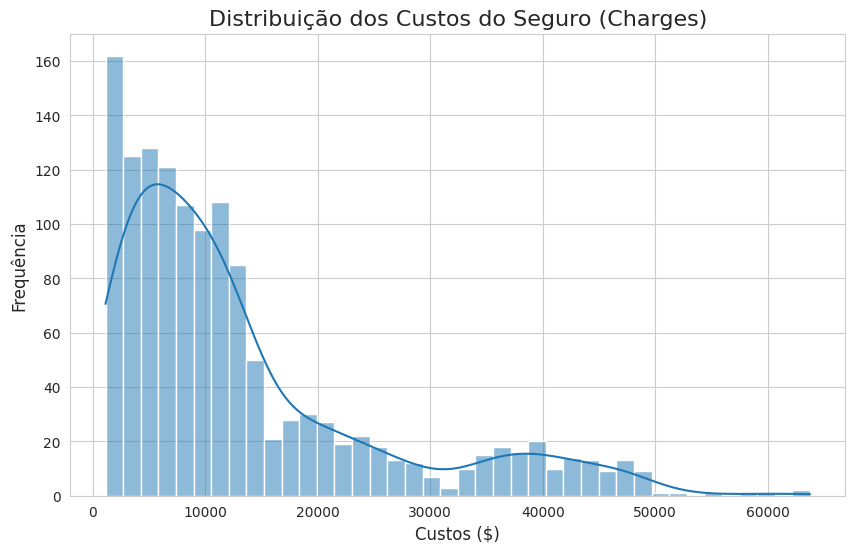

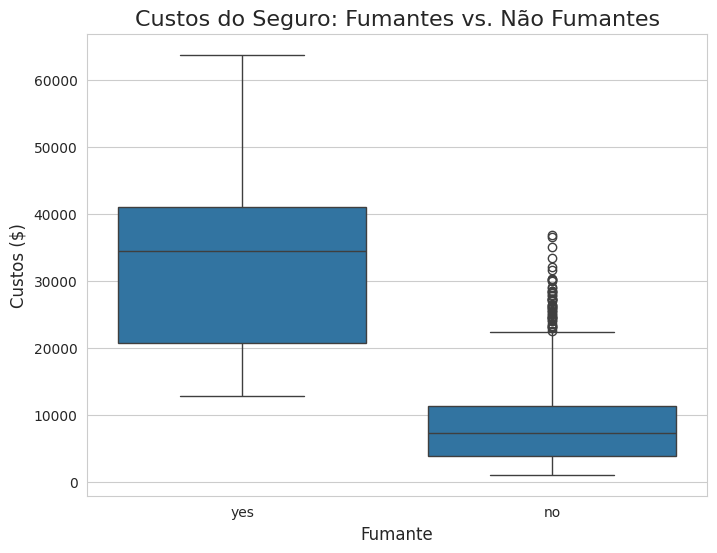

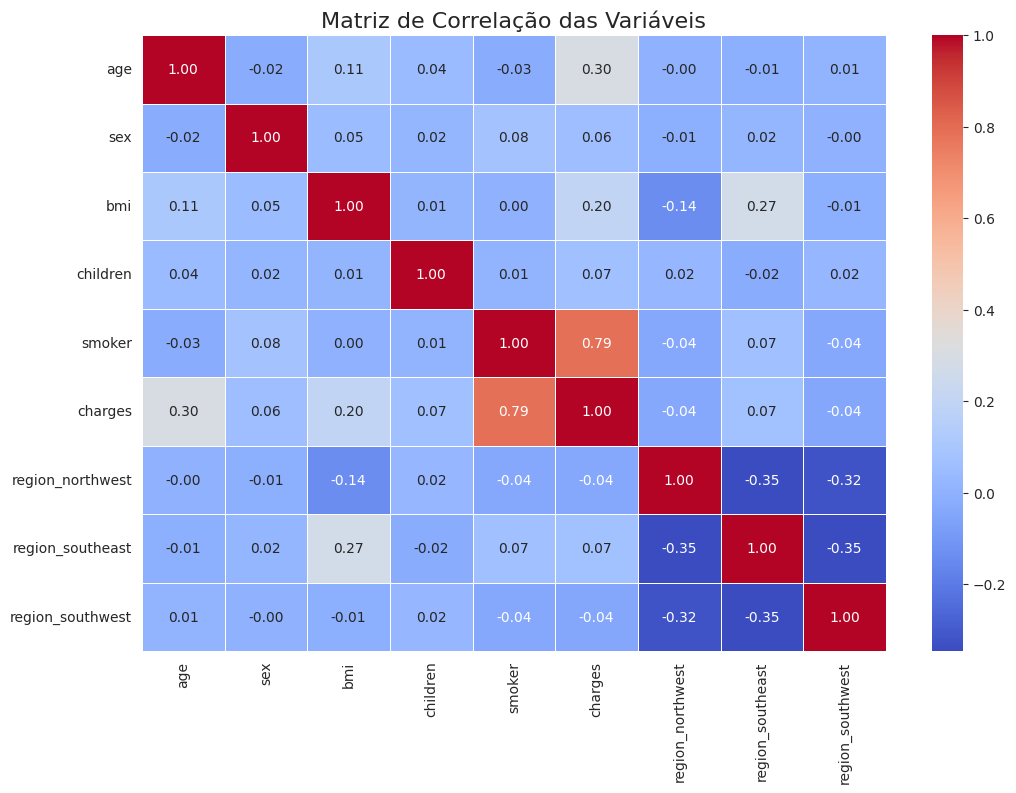

In [3]:
# 3º Passo: Realizar análise gráfica dos dados

print("Gerando gráficos para análise exploratória...")
sns.set_style("whitegrid")

# Gráfico 1: Distribuição dos Custos (Charges)
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=40)
plt.title('Distribuição dos Custos do Seguro (Charges)', fontsize=16)
plt.xlabel('Custos ($)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

# Gráfico 2: Relação entre Fumar e os Custos
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Custos do Seguro: Fumantes vs. Não Fumantes', fontsize=16)
plt.xlabel('Fumante', fontsize=12)
plt.ylabel('Custos ($)', fontsize=12)
plt.show()

# Gráfico 3: Matriz de Correlação
plt.figure(figsize=(12, 8))
corr = df_processed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis', fontsize=16)
plt.show()

###Separação dos Dados para Treino e Teste

In [4]:
# 4º Passo: Separar os arquivos de treino, teste e validação

# Separando as features (variáveis de entrada, X) e o alvo (o que queremos prever, y)
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

# Primeiro, separamos 70% para treino e 30% para o restante (teste + validação)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Agora, dividimos os 30% restantes ao meio: 15% para validação e 15% para teste
# O test_size=0.5 aqui significa 50% de X_temp, que corresponde a 15% do total.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Tamanho do conjunto de Treino: {X_train.shape[0]} amostras ({len(X_train)/len(df_processed):.0%})")
print(f"Tamanho do conjunto de Validação: {X_val.shape[0]} amostras ({len(X_val)/len(df_processed):.0%})")
print(f"Tamanho do conjunto de Teste: {X_test.shape[0]} amostras ({len(X_test)/len(df_processed):.0%})")

Tamanho do conjunto de Treino: 936 amostras (70%)
Tamanho do conjunto de Validação: 201 amostras (15%)
Tamanho do conjunto de Teste: 201 amostras (15%)


###Treinamento dos Modelos


In [5]:
# 5º Passo: Treinar diferentes algoritmos de IA

# Inicializando os modelos
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators é o número de árvores
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Dicionário de modelos para facilitar o loop
models = {
    'Regressão Linear': lr,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

# Treinando cada modelo
for name, model in models.items():
    print(f"Treinando o modelo: {name}...")
    model.fit(X_train, y_train)
print("\nTodos os modelos foram treinados com sucesso!")

Treinando o modelo: Regressão Linear...
Treinando o modelo: Random Forest...
Treinando o modelo: Gradient Boosting...

Todos os modelos foram treinados com sucesso!


###Análise de Métricas

In [6]:
# 6º Passo: Analisar as métricas dos algoritmos

print("Avaliando os modelos no conjunto de VALIDAÇÃO...\n")

results = {}

for name, model in models.items():
    # Fazer previsões no conjunto de validação
    y_pred = model.predict(X_val)

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)

    results[name] = {'RMSE': rmse, 'R2': r2}

    print(f"--- {name} ---")
    print(f"RMSE (Erro Médio): ${rmse:,.2f}")
    print(f"R² (Coeficiente de Determinação): {r2:.4f} (explica {r2:.1%} da variância dos dados)")
    print("-" * 30 + "\n")

# Escolhendo o melhor modelo com base no R²
best_model_name = max(results, key=lambda name: results[name]['R2'])
best_model = models[best_model_name]

print(f"🏆 O melhor modelo foi '{best_model_name}' com base no R² do conjunto de validação.")

# Avaliação final do melhor modelo no conjunto de TESTE (dados nunca vistos)
print("\n--- AVALIAÇÃO FINAL DO MELHOR MODELO NO CONJUNTO DE TESTE ---")
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Modelo: {best_model_name}")
print(f"RMSE no Teste: ${rmse_test:,.2f}")
print(f"R² no Teste: {r2_test:.4f}")

Avaliando os modelos no conjunto de VALIDAÇÃO...

--- Regressão Linear ---
RMSE (Erro Médio): $5,519.68
R² (Coeficiente de Determinação): 0.7840 (explica 78.4% da variância dos dados)
------------------------------

--- Random Forest ---
RMSE (Erro Médio): $4,618.87
R² (Coeficiente de Determinação): 0.8488 (explica 84.9% da variância dos dados)
------------------------------

--- Gradient Boosting ---
RMSE (Erro Médio): $4,302.55
R² (Coeficiente de Determinação): 0.8688 (explica 86.9% da variância dos dados)
------------------------------

🏆 O melhor modelo foi 'Gradient Boosting' com base no R² do conjunto de validação.

--- AVALIAÇÃO FINAL DO MELHOR MODELO NO CONJUNTO DE TESTE ---
Modelo: Gradient Boosting
RMSE no Teste: $4,579.74
R² no Teste: 0.8617


### Implantação (Simulação)

In [7]:
# 7º Passo: Implantar em produção (Simulação)

# Salvar o melhor modelo em um arquivo
model_filename = 'modelo_previsao_custo_seguro.pkl'
joblib.dump(best_model, model_filename)

print(f"Melhor modelo ('{best_model_name}') salvo como '{model_filename}'")

# Carregar o modelo (simulando um ambiente de produção)
modelo_carregado = joblib.load(model_filename)
print("Modelo carregado com sucesso para uso!\n")

# Criar uma função para fazer previsões com novos dados
def prever_custo(age, sex, bmi, children, smoker, region):
    # Criar um DataFrame com os dados de entrada
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [1 if sex == 'male' else 0],
        'bmi': [bmi],
        'children': [children],
        'smoker': [1 if smoker == 'yes' else 0],
        'region_northwest': [1 if region == 'northwest' else 0],
        'region_southeast': [1 if region == 'southeast' else 0],
        'region_southwest': [1 if region == 'southwest' else 0]
    })

    # Garantir a ordem das colunas igual ao do treino
    input_data = input_data[X_train.columns]

    # Fazer a previsão
    prediction = modelo_carregado.predict(input_data)

    return prediction[0]

# --- Exemplo de uso da função ---
print("--- SIMULANDO PREVISÃO PARA UM NOVO CLIENTE ---")
novo_cliente_custo = prever_custo(
    age=19,
    sex='female',
    bmi=27.9,
    children=0,
    smoker='yes',
    region='southwest'
)

print(f"Custo previsto para o novo cliente: ${novo_cliente_custo:,.2f}")

print("\n--- SIMULANDO PREVISÃO PARA OUTRO CLIENTE ---")
outro_cliente_custo = prever_custo(
    age=45,
    sex='male',
    bmi=24.5,
    children=2,
    smoker='no',
    region='northeast'
)
print(f"Custo previsto para o outro cliente: ${outro_cliente_custo:,.2f}")

Melhor modelo ('Gradient Boosting') salvo como 'modelo_previsao_custo_seguro.pkl'
Modelo carregado com sucesso para uso!

--- SIMULANDO PREVISÃO PARA UM NOVO CLIENTE ---
Custo previsto para o novo cliente: $18,220.99

--- SIMULANDO PREVISÃO PARA OUTRO CLIENTE ---
Custo previsto para o outro cliente: $9,750.78


## Relatório do Projeto de Previsão de Custos de Seguro

Este projeto teve como objetivo construir e avaliar modelos de machine learning para prever os custos individuais de seguro saúde, utilizando um dataset público.

**Passos Realizados:**

1.  **Importação de Bibliotecas e Carga dos Dados:** O dataset foi carregado a partir de uma URL pública utilizando a biblioteca pandas.
2.  **Tratamento de Dados:**
    *   Verificação de informações básicas do DataFrame e ausência de valores nulos.
    *   Transformação de colunas categóricas (`sex`, `smoker`, `region`) em formato numérico, utilizando mapeamento e One-Hot Encoding.
3.  **Análise Gráfica dos Dados:** Foram gerados gráficos para explorar a distribuição dos custos, a relação entre fumar e custos, e a matriz de correlação entre as variáveis, revelando insights importantes para a modelagem.
4.  **Separação dos Dados para Treino, Validação e Teste:** O dataset foi dividido em conjuntos de treino (70%), validação (15%) e teste (15%) para treinamento e avaliação imparcial dos modelos.
5.  **Treinamento dos Modelos:** Três algoritmos de regressão foram treinados nos dados de treino: Regressão Linear, Random Forest e Gradient Boosting.
6.  **Análise de Métricas:** Os modelos foram avaliados no conjunto de validação utilizando as métricas RMSE (Root Mean Squared Error) e R² (Coeficiente de Determinação). O modelo com o melhor R² no conjunto de validação foi selecionado.
7.  **Implantação (Simulação):** O melhor modelo (Gradient Boosting) foi salvo em um arquivo (`.pkl`) e carregado novamente para simular seu uso em um ambiente de produção. Uma função foi criada para prever custos com base em novos dados de entrada.

**Resultados Principais:**

*   O dataset não continha valores nulos.
*   A análise gráfica destacou a forte influência do hábito de fumar nos custos do seguro e as correlações entre as variáveis.
*   A divisão dos dados garantiu uma avaliação robusta dos modelos.
*   O modelo **Gradient Boosting** obteve as melhores métricas no conjunto de validação e foi selecionado como o melhor modelo.

**Métricas de Avaliação no Conjunto de Teste (Melhor Modelo - Gradient Boosting):**

*   **RMSE no Teste:** $4,579.74 (Indica que, em média, a previsão do modelo difere em aproximadamente $4,579.74 do custo real).
*   **R² no Teste:** 0.8617 (Significa que o modelo explica aproximadamente 86.17% da variância nos custos do seguro no conjunto de teste, demonstrando um bom poder preditivo).

**Conclusão:**

O projeto demonstrou um fluxo completo de desenvolvimento de um modelo de machine learning para prever custos de seguro saúde. O modelo Gradient Boosting mostrou-se o mais eficaz para esta tarefa, apresentando métricas de desempenho sólidas no conjunto de teste. A simulação de implantação ilustrou como o modelo treinado pode ser utilizado para fazer previsões em novos dados.